## Test the dataset module

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../../datasets/results.csv", delimiter="|")
train_df, test_df = train_test_split(df, test_size=0.02, random_state=42)

image_dir = "../../datasets/flickr30k_images"

In [2]:
from datasets import get_train_test_dataloader

train_loader, test_loader = get_train_test_dataloader(train_df, test_df, image_dir, batch_size=4)

In [3]:
train_first_data = next(iter(train_loader))

train_first_data[0].shape, train_first_data[1]

(torch.Size([4, 3, 224, 224]),
 (' Several men in hard hats are operating a giant pulley system .',
  ' Three men on a large rig .',
  ' Four men on top of a tall structure .',
  ' Two men working on a machine wearing hard hats .'))

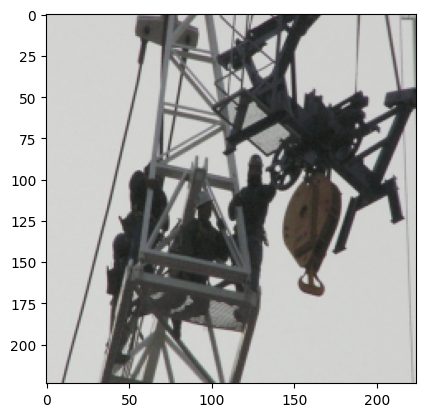

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_first_data[0][0].permute(1, 2, 0))

---

## Test the vision-transformer module

In [5]:
import torch
from vision_transformer_encoder import ViTEncoder

# RANDOM_SEED = 42
BATCH_SIZE = 10
EPOCHS = 20

LEARNING_RATE = 1e-3
PATCH_SIZE = 16
IMG_SIZE = 224
IN_CHANNELS = 3
NUM_HEADS = 8
DROPOUT = 0.001
ADAM_WEIGHT_DECAY = 0
ADAM_BETAS = (0.9, 0.999)
ACTIVATION = "gelu"
NUM_ENCODERS = 4
EMBED_DIM = (PATCH_SIZE**2) * IN_CHANNELS  # 768
NUM_PATCHES = (IMG_SIZE // PATCH_SIZE) ** 2  # 196


device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
model = ViTEncoder(
    NUM_PATCHES,
    IMG_SIZE,
    PATCH_SIZE,
    EMBED_DIM,
    NUM_ENCODERS,
    NUM_HEADS,
    DROPOUT,
    ACTIVATION,
    IN_CHANNELS,
).to(device)

In [7]:
random_image = torch.randn(BATCH_SIZE, 3, 224, 224).clip(0,1).to(device)
print(f"{BATCH_SIZE=}")
print(f"{random_image.shape=}")

print(model(random_image).shape)  # BATCH_SIZE X (NUM_PATCHES+1) X EMBED_DIM

BATCH_SIZE=10
random_image.shape=torch.Size([10, 3, 224, 224])
torch.Size([10, 197, 768])


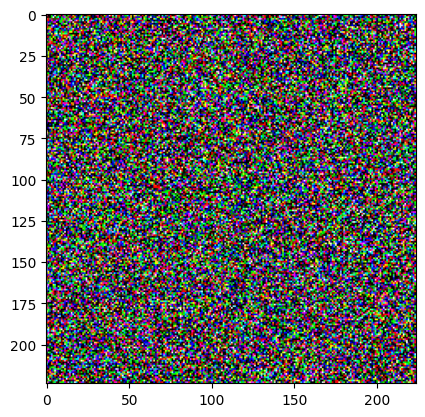

In [8]:
import matplotlib.pyplot as plt

plt.imshow(random_image[0].permute(1, 2, 0).cpu().detach())

----

## Test the vocabulary module

In [9]:
import pandas as pd
from caption_vocab import MyVocab

df = pd.read_csv("../../datasets/results.csv", delimiter="|")
my_vocab = MyVocab(df=df, column_name=" comment")

In [10]:
token_arr = my_vocab.get_token_index_from_sentence(
    "Several men in hard hats are operating a giant pulley system .",max_len=20
)

len(token_arr), token_arr[:4]

(20, [2, 26, 6, 18])

In [11]:
my_vocab.PAD_IDX, my_vocab.BOS_IDX, my_vocab.EOS_IDX, my_vocab.UNK_IDX

(1, 2, 3, 0)

In [12]:
my_vocab.get_sentence_from_indices(token_arr)

'several men in hard hats are operating a giant pulley system .'